In [2]:
library(tidyverse)
theme_set(theme_classic())
options(repr.plot.width=10, repr.plot.height=5)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# STATS 504
## Week 6 (part deux): working with NHANES data

## Questions we will study today
1. Is height associated with income? (Does height *cause* you to have higher income?)
2. Is smoking associated with high blood pressure (hypertension)?
3. How does TV watching affect body weight?

## The data

- [**NHANES**](https://www.cdc.gov/nchs/nhanes/index.htm) stands for the National Health and Nutrition Examination Survey.
- Series of studies designed to assess the health and nutritional status of adults and children in the United States.
- Conducted by the National Center for Health Statistics (NCHS), part of the Centers for Disease Control and Prevention (CDC).

## Purpose of NHANES

- To determine the prevalence of major diseases and risk factors for diseases.
- To assess nutritional status and its association with health promotion and disease prevention.
- To guide public health policy and priorities.



## How NHANES Works

- NHANES combines interviews and physical examinations.
- The interview includes demographic, socioeconomic, dietary, and health-related questions.
- The examination part includes medical, dental, and physiological measurements, as well as laboratory tests administered by medical personnel.
- NHANES data is collected in 2-year cycles and released in public-use data files.

For today's lecture we will use the following "pre-packaged" NHANES extracted dataset:

In [3]:
# install.packages('NHANES')
library(NHANES)
data(NHANES)

(Next week, we will see how to import the raw data directly off their website.)

In [25]:
# ?NHANES

## Height vs. income
It is often claimed that taller people earn more money. Do we see this in the data?

Warning message:
“Removed 1138 rows containing missing values (`geom_point()`).”


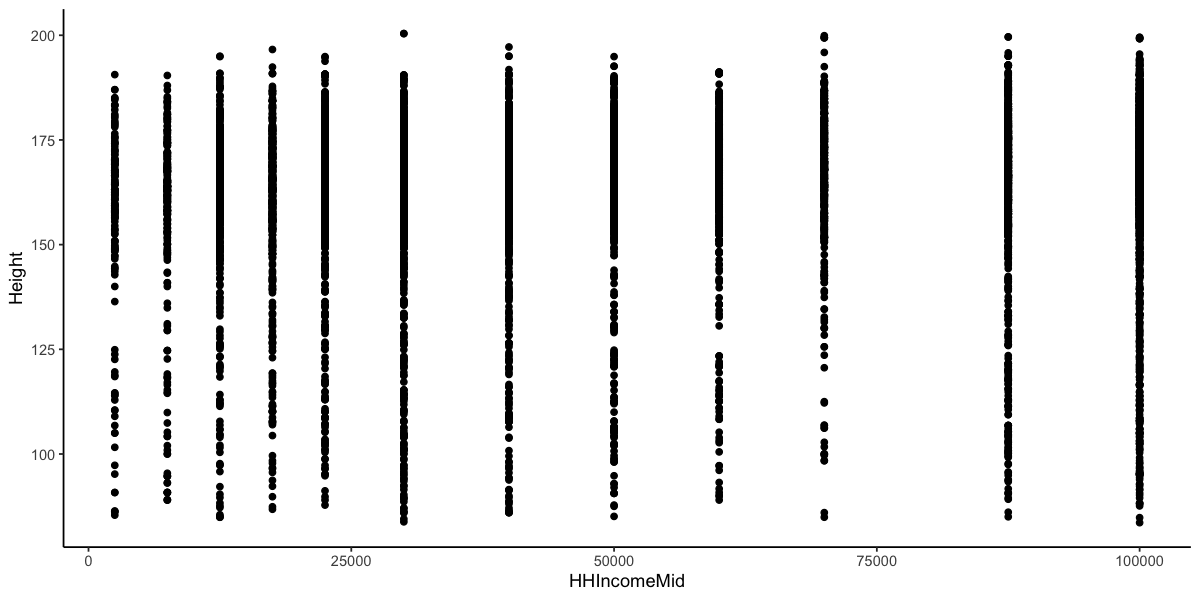

In [163]:
NHANES %>% ggplot(aes(x=HHIncomeMid, y=Height)) + geom_point()

In [4]:
lm(HHIncomeMid ~ Height, data=NHANES) %>% summary


Call:
lm(formula = HHIncomeMid ~ Height, data = NHANES)

Residuals:
   Min     1Q Median     3Q    Max 
-60351 -29370  -4989  37149  57395 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  26785.5     2790.8   9.598   <2e-16 ***
Height         189.2       17.1  11.068   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 32770 on 8860 degrees of freedom
  (1138 observations deleted due to missingness)
Multiple R-squared:  0.01364,	Adjusted R-squared:  0.01353 
F-statistic: 122.5 on 1 and 8860 DF,  p-value: < 2.2e-16


Let's try stratifying income into quartiles:

In [ ]:
NHANES %>% drop_na(Height, HHIncomeMid) %>% 
    mutate(inc_qtile = factor(ntile(HHIncomeMid, 4))) ->
    inc_q

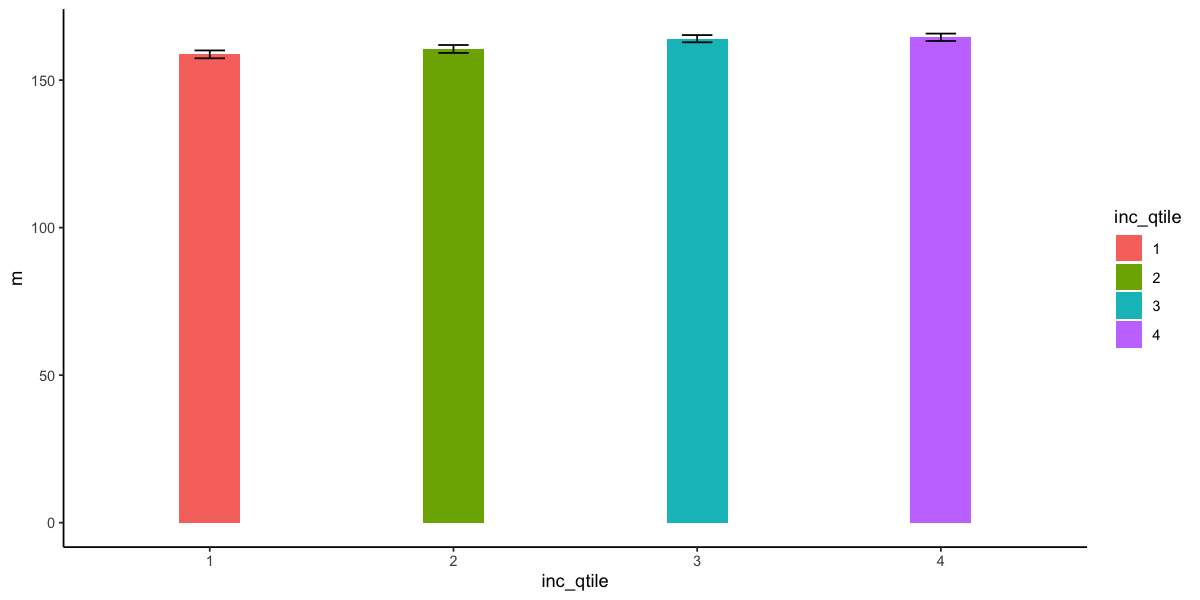

In [9]:
inc_q %>%
    group_by(inc_qtile) %>% 
    summarize(m = mean(Height), sem = sd(Height) / sqrt(n())) %>% 
    ggplot(aes(x=inc_qtile, fill=inc_qtile)) + geom_col(aes(y=m), width=0.25) + 
    geom_errorbar(aes(ymin = m - 3 * sem, ymax = m + 3 * sem), width=0.125)

In [10]:
inc_q %>% 
    lm(Height ~ inc_qtile, data = .) %>% summary


Call:
lm(formula = Height ~ inc_qtile, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-80.921  -4.921   4.336  12.536  39.836 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 158.7277     0.4295 369.524  < 2e-16 ***
inc_qtile2    1.8362     0.6075   3.023  0.00251 ** 
inc_qtile3    5.3176     0.6075   8.753  < 2e-16 ***
inc_qtile4    5.7937     0.6075   9.536  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 20.22 on 8858 degrees of freedom
Multiple R-squared:  0.01406,	Adjusted R-squared:  0.01372 
F-statistic:  42.1 on 3 and 8858 DF,  p-value: < 2.2e-16


## Digression: association vs. causation
- The preceding analyses reveal that there is strong *association* between income and height.
- Does that mean that being taller *causes you* to have higher income? (Why or why not?)
- (We will return to these points in a future lecture.)

## Is blood pressure elevated in smokers?

- Smoking tobacco increases heart rate and blood pressure. Long-term smoking can lead to the development of hypertension and other cardiovascular diseases.
- Nicotine from cigarettes stimulates the body to produce adrenaline, which accelerates the heart rate and raises blood pressure. Other chemicals in tobacco can damage the arterial walls, contributing to heart conditions.
- Numerous studies have shown a correlation between smoking and increased risk of developing hypertension. This relationship is dose-dependent, with heavier smoking leading to greater risks.
- Do we see such a relationship in the NHANES data?

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


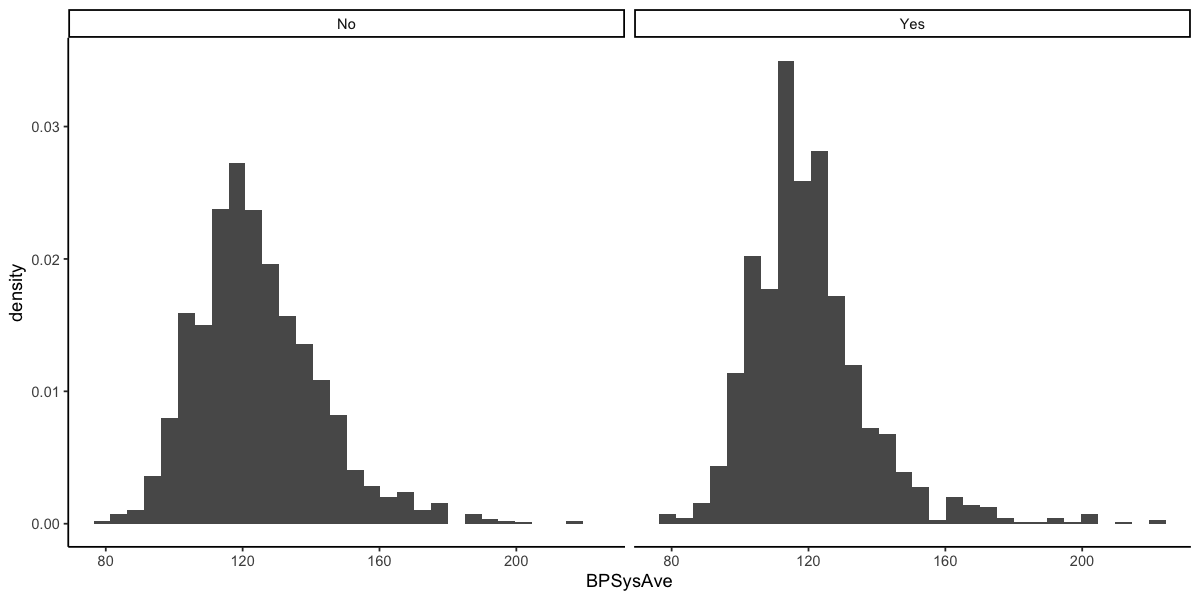

In [11]:
NHANES %>% drop_na(BPSysAve, SmokeNow) %>% ggplot +
    geom_histogram(aes(BPSysAve, after_stat(density))) +
    facet_grid(~ SmokeNow)

It's visually hard for me to distinguish these two distributions. 

In [12]:
NHANES %>%
    lm(BPSysAve ~ SmokeNow, data = .) %>% 
    summary


Call:
lm(formula = BPSysAve ~ SmokeNow, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.384 -12.120  -2.384   8.616 100.880 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 124.3838     0.4319 287.974  < 2e-16 ***
SmokeNowYes  -4.2641     0.6426  -6.635  3.8e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.83 on 3106 degrees of freedom
  (6892 observations deleted due to missingness)
Multiple R-squared:  0.01398,	Adjusted R-squared:  0.01366 
F-statistic: 44.03 on 1 and 3106 DF,  p-value: 3.804e-11


- We get the (possibly) counter-intuitive result that blood pressure is lower in smokers. 
- What are possible explanations for this?

In [13]:
NHANES %>%
    lm(BPSysAve ~ SmokeNow + AgeMonths + Gender + BMI + AlcoholYear, data = .) %>% 
    summary


Call:
lm(formula = BPSysAve ~ SmokeNow + AgeMonths + Gender + BMI + 
    AlcoholYear, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-53.610  -9.253  -1.926   7.837  79.608 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 93.755921   2.629492  35.656  < 2e-16 ***
SmokeNowYes  1.143666   0.939801   1.217   0.2238    
AgeMonths    0.032592   0.002520  12.934  < 2e-16 ***
Gendermale   5.160460   0.879322   5.869 5.53e-09 ***
BMI          0.153822   0.066941   2.298   0.0217 *  
AlcoholYear  0.007889   0.004012   1.967   0.0494 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.93 on 1338 degrees of freedom
  (8656 observations deleted due to missingness)
Multiple R-squared:  0.1493,	Adjusted R-squared:  0.1461 
F-statistic: 46.96 on 5 and 1338 DF,  p-value: < 2.2e-16


Let's try looking at this through a different lens. The American Heart Association defines hypertension as systolic blood pressure > 130 mm Hg or diastolic bp > 80 mm Hg. Let's try logistic regression on hypertensive status.

In [14]:
hypt_df <- NHANES %>% mutate(hypt = (BPSysAve > 130) | (BPDiaAve > 80)) %>% drop_na(hypt)
summarize(hypt_df, mean(hypt))

mean(hypt)
<dbl>
0.2668694


In [94]:
glm(hypt ~ SmokeNow, data = hypt_df, family = "binomial")


Call:  glm(formula = hypt ~ SmokeNow, family = "binomial", data = hypt_df)

Coefficients:
(Intercept)  SmokeNowYes  
    -0.3825      -0.5624  

Degrees of Freedom: 3107 Total (i.e. Null);  3106 Residual
  (5443 observations deleted due to missingness)
Null Deviance:	    4020 
Residual Deviance: 3966 	AIC: 3970

In fact there are four stages of hypertension:
- **Normal Blood Pressure**
  - Systolic: Less than 120 mm Hg
  - Diastolic: Less than 80 mm Hg
- **Elevated Blood Pressure**
  - Systolic: 120-129 mm Hg
  - Diastolic: Less than 80 mm Hg
- **Hypertension Stage 1**
  - Systolic: 130-139 mm Hg
  - Diastolic: 80-89 mm Hg
- **Hypertension Stage 2**
  - Systolic: At least 140 mm Hg
  - Diastolic: At least 90 mm Hg
- **Hypertensive Crisis (Emergency situation)**
  - Systolic: Over 180 mm Hg and/or
  - Diastolic: Over 120 mm Hg

In [15]:
bp_df <- NHANES %>%
  mutate(BPStage = case_when(
    BPSysAve < 120 & BPDiaAve < 80 ~ "Normal",
    BPSysAve >= 120 & BPSysAve < 130 & BPDiaAve < 80 ~ "Elevated",
    BPSysAve >= 130 & BPSysAve < 140 | BPDiaAve >= 80 & BPDiaAve < 90 ~ "Hypertension Stage 1",
    BPSysAve >= 140 | BPDiaAve >= 90 ~ "Hypertension Stage 2",
    BPSysAve > 180 | BPDiaAve > 120 ~ "Hypertensive Crisis",
    TRUE ~ NA_character_ # for cases that don't fit any criteria or missing data
  )) 

# View the distribution of blood pressure stages
table(bp_df$BPStage)


            Elevated Hypertension Stage 1 Hypertension Stage 2 
                1248                 1720                  789 
              Normal 
                4794 

## Effects at the tails
Let's consider whether there is a measurable effect for stage 2 hypertension:

In [120]:
lm(BPStage == "Hypertension Stage 2" ~ SmokeNow + Gender + Age, data=bp_df) %>% summary


Call:
lm(formula = BPStage == "Hypertension Stage 2" ~ SmokeNow + Gender + 
    Age, data = bp_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.32962 -0.17495 -0.09017 -0.00094  1.03476 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.1899786  0.0219012  -8.674  < 2e-16 ***
SmokeNowYes  0.0064938  0.0121049   0.536  0.59168    
Gendermale   0.0371872  0.0114340   3.252  0.00116 ** 
Age          0.0059490  0.0003585  16.594  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3159 on 3104 degrees of freedom
  (6892 observations deleted due to missingness)
Multiple R-squared:  0.0918,	Adjusted R-squared:  0.09093 
F-statistic: 104.6 on 3 and 3104 DF,  p-value: < 2.2e-16


## Ordinal logistic regression

Ordinal Logistic Regression, also known as Ordered Logit Regression, is a statistical technique used for modeling the relationship between an ordinal dependent variable and one or more independent variables.

- Ordinal dependent variable: A categorical variable with a clear ordering of the categories, but not necessarily a constant difference between categories.
- Independent variables: Can be continuous, dichotomous, or categorical, and are used to predict the ordinal outcome.


### OLR model
$$
\log\left(\frac{P(Y \leq j)}{P(Y > j)}\right) = \alpha_j - \beta X, \quad j = 1, 2, \ldots, J-1
$$

where:

- $Y$ is the ordinal dependent variable with $J$ ordered categories.
- $P(Y \leq j)$ is the cumulative probability of $Y$ being in category $j$ or lower.
- $X$ represents the vector of independent variables (predictors).
- $\beta$ is the vector of coefficients associated with the predictors.
- $\alpha_j$ are the threshold parameters (cutpoints) for each $j$th category, with $j = 1, 2, \ldots, J-1$.

### Proportional odds assumption
The model implies the following key assumption:
$$
\frac{\partial}{\partial X}\log\left(\frac{P(Y \leq j)}{P(Y > j)}\right) = -\beta, \quad \text{for all } j
$$

This says that the odds ratios comparing any two outcome categories are assumed to be the same across all levels of the predictors.

In [ ]:
bp_df$BPStage <- factor(
    bp_df$BPStage, ordered = TRUE, 
     levels = c("Normal", "Elevated", "Hypertension Stage 1", 
                "Hypertension Stage 2", "Hypertensive Crisis")
    )

In [106]:
library(MASS)
mdl <- polr(BPStage ~ Age + Gender + SmokeNow, data = bp_df, Hess=TRUE)
summary(mdl)

Call:
polr(formula = BPStage ~ Age + Gender + SmokeNow, data = bp_df, 
    Hess = TRUE)

Coefficients:
               Value Std. Error t value
Age          0.04387   0.002293 19.1302
Gendermale   0.56211   0.070051  8.0243
SmokeNowYes -0.03782   0.073323 -0.5157

Intercepts:
                                          Value   Std. Error t value
Normal|Elevated                            2.2568  0.1408    16.0271
Elevated|Hypertension Stage 1              3.0016  0.1448    20.7237
Hypertension Stage 1|Hypertension Stage 2  4.5871  0.1578    29.0753
Hypertension Stage 2|Hypertensive Crisis  16.1372 15.1684     1.0639

Residual Deviance: 7332.728 
AIC: 7346.728 
(6892 observations deleted due to missingness)

### Interpretation

Important to distinguish between the coefficients and the odds ratios:

- **Coefficients**: Represent the log odds of being in a higher category of the outcome variable for a one-unit increase in the predictor.
- **Odds Ratios**: Exponentiated coefficients, indicating how the odds of being in a higher category change with a one-unit increase in the predictor.

Hence:

- **Positive Coefficient (Odds Ratio > 1)**: Indicates an increase in the predictor is associated with higher odds of being in a higher category.
- **Negative Coefficient (Odds Ratio < 1)**: Suggests an increase in the predictor is associated with lower odds of being in a higher category.

In [109]:
exp(coef(mdl))

Age  Gendermale SmokeNowYes 
  1.0448461   1.7543711   0.9628896

## TV watching and and body mass
How does watching TV associate with body weight among individuals in the NHANES dataset? We'll study this in several ways:

- **Descriptive Analysis**: Understand the distribution of TV and BMI.
- **Correlation Analysis**: Examine the linear relationship between TV and BMI.
- **Linear Regression**: Assess the impact of TV on BMI, controlling for confounders.
- **Logistic Regression**: Evaluate the odds of being overweight or obese with increased TV watching.
- **Mixed Models/GEE**: Account for clustering within the data.
- **Non-Linear Models**: Explore potential non-linear relationships between TV and BMI.

### Descriptive analysis
We start by considering the distribution of BMI. The WHO defines BMI according to the following levels:
- Underweight: BMI less than 18.5+
- Normal weight: BMI 18.5 to 24.9
- Overweight: BMI 25 to 29.9
- Obesity: BMI 30 and above

Warning message:
“Removed 366 rows containing non-finite values (`stat_bin()`).”


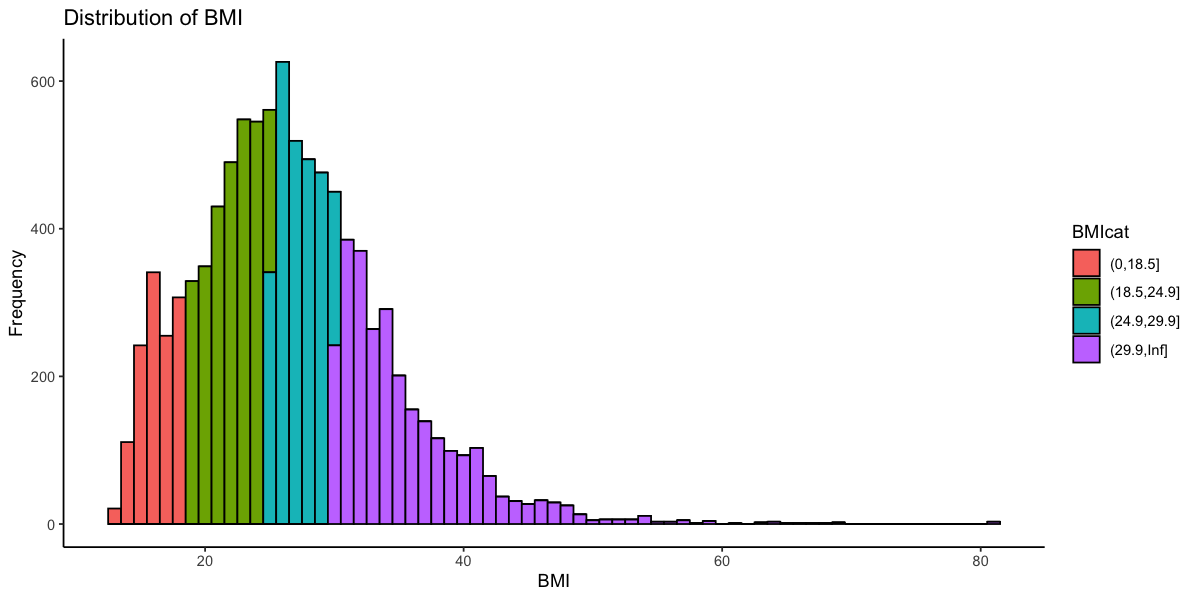

In [31]:
# Histogram of BMI
NHANES %>% mutate(BMIcat = cut(BMI, c(0, 18.5, 24.9, 29.9, Inf))) %>% 
  ggplot(aes(x = BMI, fill = BMIcat)) +
  geom_histogram(binwidth = 1, color = "black") +
  labs(title = "Distribution of BMI", x = "BMI", y = "Frequency")

Warning message:
“Removed 366 rows containing non-finite values (`stat_bin()`).”


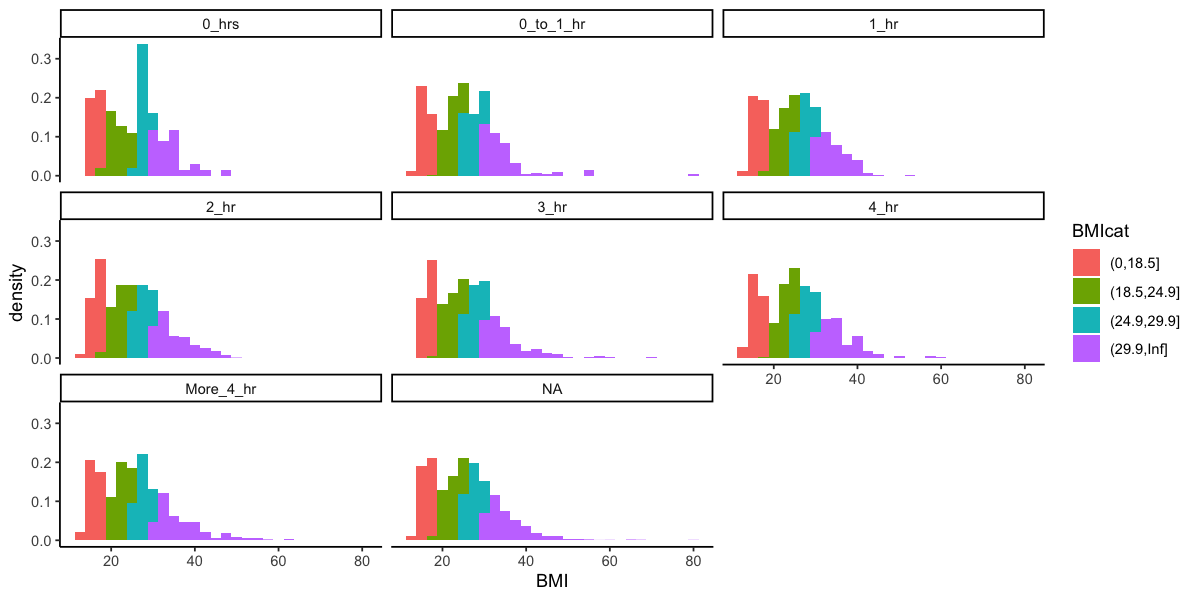

In [29]:
# Histogram of BMI
NHANES %>% mutate(BMIcat = cut(BMI, c(0, 18.5, 24.9, 29.9, Inf))) %>% 
  ggplot(aes(x = BMI, fill = BMIcat)) +
  geom_histogram(aes(y = after_stat(density)), binwidth = 2.5) +
  facet_wrap(~ TVHrsDay)

In [38]:
NHANES %>% drop_na(TVHrsDay, BMI) %>%
    group_by(TVHrsDay) %>% summarize(across(BMI, c(mean, sd)))

TVHrsDay,BMI_1,BMI_2
<fct>,<dbl>,<dbl>
0_hrs,25.43762,6.577703
0_to_1_hr,24.86483,6.672488
1_hr,24.61807,6.599504
2_hr,26.01505,6.951042
3_hr,27.79588,7.599771
4_hr,27.95876,7.058201
More_4_hr,28.75993,8.105659


Warning message:
“Removed 366 rows containing non-finite values (`stat_boxplot()`).”


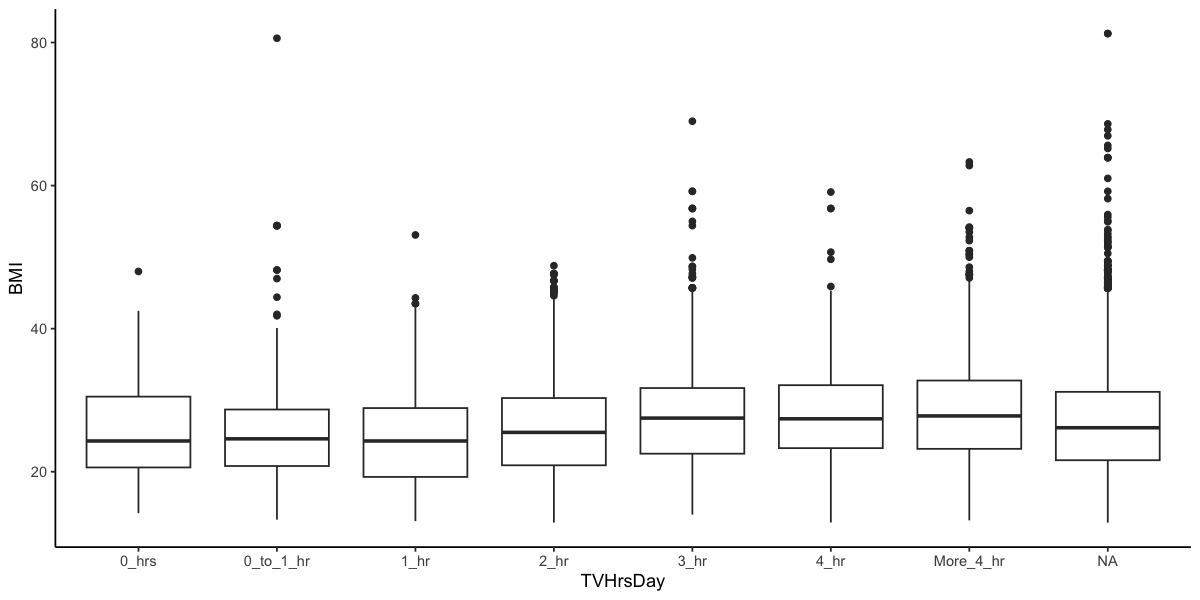

In [39]:
# Boxplot of BMI by TV category
NHANES %>% ggplot(aes(x = TVHrsDay, y = BMI)) + geom_boxplot()

## Regression analysis
Next, let's model the effect of TV watching on BMI. We'll try two different ways:

In [40]:
lm(BMI ~ TVHrsDay, data = NHANES) %>% summary


Call:
lm(formula = BMI ~ TVHrsDay, data = NHANES)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.560  -5.059  -0.515   4.104  55.735 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        25.4376     0.7092  35.869  < 2e-16 ***
TVHrsDay0_to_1_hr  -0.5728     0.7636  -0.750  0.45321    
TVHrsDay1_hr       -0.8196     0.7488  -1.095  0.27378    
TVHrsDay2_hr        0.5774     0.7369   0.784  0.43330    
TVHrsDay3_hr        2.3583     0.7513   3.139  0.00171 ** 
TVHrsDay4_hr        2.5211     0.7773   3.244  0.00119 ** 
TVHrsDayMore_4_hr   3.3223     0.7662   4.336 1.48e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.127 on 4809 degrees of freedom
  (5184 observations deleted due to missingness)
Multiple R-squared:  0.04216,	Adjusted R-squared:  0.04096 
F-statistic: 35.28 on 6 and 4809 DF,  p-value: < 2.2e-16


Next, let's try with the categorized `TVHrsDay` replaced by a continuous estimate:

In [41]:
NHANES <- NHANES %>%
  mutate(TVHrsDayNum = case_when(
    TVHrsDay == "0_to_1_hr" ~ 0.5, # Assuming the midpoint of 0 to 1 hour is 0.5 hours
    TVHrsDay == "1_hr" ~ 1,        # Exact value for 1 hour
    TVHrsDay == "2_hr" ~ 2,        # Exact value for 2 hours
    TVHrsDay == "3_hr" ~ 3,        # Exact value for 3 hours
    TVHrsDay == "4_hr" ~ 4,        # Exact value for 4 hours
    TVHrsDay == "More_4_hr" ~ 4.5  # Assuming the midpoint for "More than 4 hours" as 4.5 hours
  )) 
lm(BMI ~ TVHrsDayNum + Age + Gender + PhysActiveDays, data = NHANES) %>% summary


Call:
lm(formula = BMI ~ TVHrsDayNum + Age + Gender + PhysActiveDays, 
    data = NHANES)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.610  -4.523  -1.263   3.450  36.746 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    20.087554   0.448290  44.809  < 2e-16 ***
TVHrsDayNum     0.476774   0.103802   4.593 4.61e-06 ***
Age             0.134558   0.006296  21.373  < 2e-16 ***
Gendermale      0.167733   0.268506   0.625    0.532    
PhysActiveDays -0.017620   0.073261  -0.241    0.810    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.352 on 2239 degrees of freedom
  (7756 observations deleted due to missingness)
Multiple R-squared:  0.2007,	Adjusted R-squared:  0.1993 
F-statistic: 140.6 on 4 and 2239 DF,  p-value: < 2.2e-16


### Effect on obesity
Let's consider the effect on obesity (which is defined above as BMI > 30).

In [42]:
glm(BMI > 30 ~ TVHrsDayNum + Age + Gender*Race1 + PhysActiveDays, data = NHANES, family = "binomial") %>% summary


Call:
glm(formula = BMI > 30 ~ TVHrsDayNum + Age + Gender * Race1 + 
    PhysActiveDays, family = "binomial", data = NHANES)

Coefficients:
                          Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -1.473955   0.247189  -5.963 2.48e-09 ***
TVHrsDayNum               0.154609   0.038395   4.027 5.65e-05 ***
Age                       0.023479   0.002467   9.517  < 2e-16 ***
Gendermale               -0.876535   0.276104  -3.175 0.001500 ** 
Race1Hispanic            -1.126535   0.358827  -3.139 0.001692 ** 
Race1Mexican             -0.383393   0.287652  -1.333 0.182584    
Race1White               -0.946331   0.209675  -4.513 6.38e-06 ***
Race1Other               -1.875413   0.377362  -4.970 6.70e-07 ***
PhysActiveDays           -0.013287   0.027497  -0.483 0.628951    
Gendermale:Race1Hispanic  1.524986   0.497916   3.063 0.002193 ** 
Gendermale:Race1Mexican   0.897445   0.408339   2.198 0.027964 *  
Gendermale:Race1White     1.003690   0.303237   3.310 0

How can we use the logistic regression model to give a "predicted probability of obesity"?

In [ ]:
# pred prob

### Non-linear model

Generalized Additive Models (GAMs) extend linear models by allowing non-linear relationships between the independent variables and the dependent variable through the use of smooth functions.
- A GAM can be expressed as $y = \beta_0 + f_1(x_1) + f_2(x_2) + \cdots + f_n(x_n) + \epsilon$, where $y$ is the dependent variable, $\beta_0$ is the intercept, $f_i$ are smooth functions for each predictor $x_i$, and $\epsilon$ is the error term.
- In our example, we'll suppose that 

$$\text{BMI} = s(\text{Age}) + \text{other predictors},$$

where $s()$ denotes a smoothing function applied to soda consumption.

In [156]:
library(mgcv)
gam_model <- gam(BMI ~ TVHrsDayNum + s(Age) + Gender + PhysActiveDays, data = NHANES)
summary(gam_model)


Family: gaussian 
Link function: identity 

Formula:
BMI ~ TVHrsDayNum + s(Age) + Gender + PhysActiveDays

Parametric coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    24.66344    0.37265  66.184  < 2e-16 ***
TVHrsDayNum     0.69500    0.09488   7.325 3.32e-13 ***
Gendermale      0.12710    0.24260   0.524    0.600    
PhysActiveDays -0.01956    0.06611  -0.296    0.767    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Approximate significance of smooth terms:
        edf Ref.df     F p-value    
s(Age) 7.66  8.539 126.6  <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

R-sq.(adj) =  0.349   Deviance explained = 35.2%
GCV = 32.966  Scale est. = 32.795    n = 2244

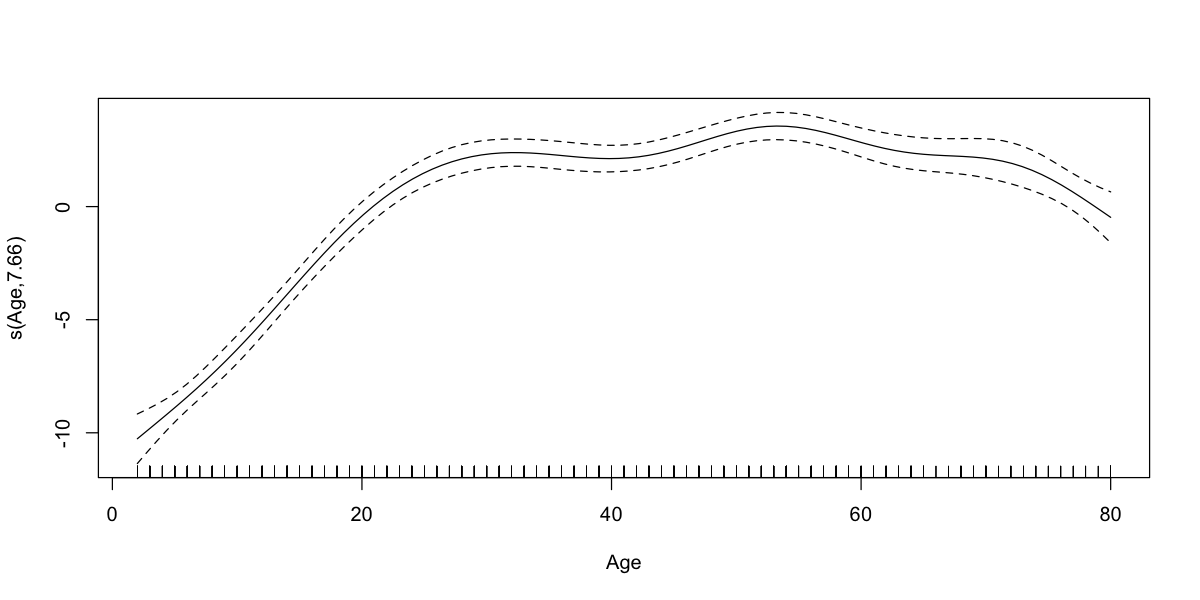

In [160]:
plot(gam_model)